### Basic wine analytics

This notebook demonstrates how we can load the same data with different structures into atoti datacube and achieve a simple storytelling dashboard as shown below:

<img src="https://data.atoti.io/notebooks/wine-analytics/storytelling.gif" alt="atoti table" width="800"/>

In [1]:
import atoti as tt
import numpy as np
import pandas as pd
import seaborn as sns

### Reading data for red and white wine

In [2]:
wine_red = pd.read_csv(
    "https://data.atoti.io/notebooks/wine-analytics/winequality-red.csv", sep=";"
)
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_white = pd.read_csv(
    "https://data.atoti.io/notebooks/wine-analytics/winequality-white.csv", sep=";"
)
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Merging dataset for loading into atoti

In [4]:
wine_red["category"] = "Red"
wine_white["category"] = "White"

wines = pd.concat([wine_red, wine_white], axis=0, ignore_index=True)
wines.index.set_names("wine index", inplace=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
wine index,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [5]:
wines["alcohol range"] = wines["alcohol"].apply(np.floor)

In [6]:
wines["Rating"] = "Good"
wines.loc[wines["quality"] < 7, "Rating"] = "Average"
wines.loc[wines["quality"] < 5, "Rating"] = "Poor"
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,alcohol range,Rating
wine index,,,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red,9.0,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red,9.0,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red,9.0,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red,9.0,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red,9.0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White,11.0,Average
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White,9.0,Average
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White,9.0,Average


### Getting started with atoti

In [7]:
session = tt.create_session(config={"user_content_storage": "./content_full"})

In [8]:
wines_table = session.read_pandas(
    wines,
    keys=["wine index"],
    table_name="Wines Quality",
    hierarchized_columns=[
        "wine index",
        "category",
        "quality",
        "alcohol range",
        #         "pH range",
        "Rating",
        "sulphates",
    ],
)
wines_table.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,alcohol range,Rating
wine index,,,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,9.0,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,9.0,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,9.0,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,9.0,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,9.0,Average


In [9]:
cube = session.create_cube(wines_table, "Wines Analytics 1")

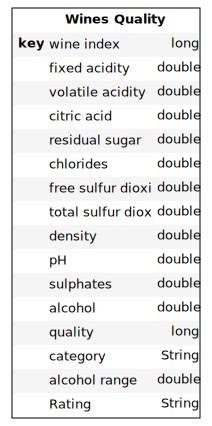

In [10]:
cube.schema

### Quick analytics

In [11]:
session.visualize("Types of wine")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [12]:
session.visualize("Quality of wine")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [13]:
session.visualize("Wine sample by alcohol rate")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Wine analysis by correlated features

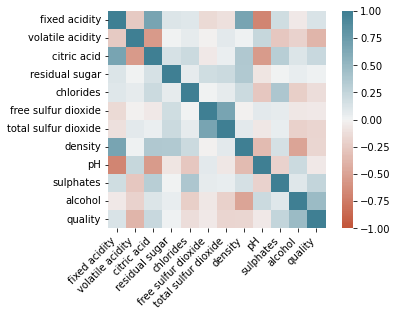

In [14]:
corr_red = wine_red.corr()
ax_red = sns.heatmap(
    corr_red,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax_red.set_xticklabels(
    ax_red.get_xticklabels(), rotation=45, horizontalalignment="right"
);

Let's look at the features that are correlated to the quality. 

The correlation value is not very high, so just for demonstrative purpose, we will take the threshold value of 0.25 to select a few key features that are most correlated. We will not consider the interaction between the features.

In [15]:
corr_red[(corr_red["quality"] > 0.25) | (corr_red["quality"] < -0.25)]["quality"]

volatile acidity   -0.390558
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

In [16]:
corr_white = wine_white.corr()
corr_white[(corr_white["quality"] > 0.25) | (corr_white["quality"] < -0.25)]["quality"]

density   -0.307123
alcohol    0.435575
quality    1.000000
Name: quality, dtype: float64

#### Creating hierarchy from numerical column

In [17]:
h, m = cube.hierarchies, cube.measures

In [18]:
h["alcohol"] = [wines_table["alcohol"]]

In [19]:
session.visualize("Red wine - Volatile acidity against alcohol")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Good red wines tend to have lower volatile acidity and alcohol rate around 11~13%. Let's try viewing it from a different angle.  

In [20]:
h["volatile acidity"] = [wines_table["volatile acidity"]]

In [21]:
# TBC
m["Average rating"] = 7
m["Poor rating"] = 5

In [22]:
session.visualize("Volatile acidity against quality")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

We see that lower volatile acidity generally yield better quality for both red and white wines.

In [23]:
session.visualize("Sulphate level")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Overall, red wines have higher sulphates level than white wine. Also, good red wines seem to have higher sulphate level.

### Wine characteristics

In [24]:
wine_variables = wines.reset_index()
wine_variables.head()

,wine index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,alcohol range,Rating
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,9.0,Average
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,9.0,Average
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,9.0,Average
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,9.0,Average
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,9.0,Average


Previously we have loaded the above data as it is into the cube. Hence, each feature becomes a hierarchy with the underlying data becoming members of the hierarchy.  

Now, using `pandas.melt`, we transform the data such that we have a column `variable` that contains the features, and a colume `value` that stores the corresponding value of each feature of the wines. By having a different representation of the same data, we are now able to have a hierarchy `variable` with the features as its members. This gives us even more flexibility in our storytelling as we start exploring the filtering feature of atoti.

In [25]:
wine_variables = pd.melt(
    wine_variables,
    id_vars=["wine index"],
    value_vars=[
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol",
    ],
)

In [26]:
wine_variables.head()

,wine index,variable,value
0,0,fixed acidity,7.4
1,1,fixed acidity,7.8
2,2,fixed acidity,7.8
3,3,fixed acidity,11.2
4,4,fixed acidity,7.4


In [27]:
wine_variables_table = session.read_pandas(
    wine_variables, table_name="wine variables", keys=["wine index", "variable"]
)

We could start a new cube with the new data representative or simply join it to the base table that we have previously created.

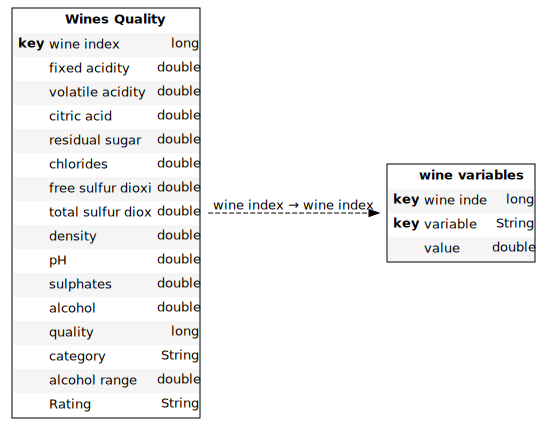

In [28]:
wines_table.join(wine_variables_table)
cube.schema

In [29]:
m["value"] = tt.agg.mean(wine_variables_table["value"])

By setting `"isTextVisible": true`for the chart, we are able to display the value of the columns. Refer to the Cell Metadata of the next cell.

In [30]:
session.visualize("Wine characteristics comparison")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

White wine generally has higher residual sugar, total sulfur dioxide and free sulfur dioxide than red wine.
Also, it has lower chlorides and volatile acidity.

In [31]:
session.visualize("Characteristic of red wine")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [32]:
h["value"] = [wine_variables_table["value"]]

When we load each feature as a hierarchy, we will add each hierarchy to the visualization when we want to analyse them.

In [33]:
session.visualize("Volatile acidity as a hierarchy")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Alternatively, by tweaking the data such that each feature becomes a member of the wine variable hierarchy, we simply add the `variable` hierarhcy and play around with the filter to see the features that we want to analyse.

In [34]:
session.visualize("Wine variable against quality - member of hierarchy")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [35]:
session.link(path="/#/dashboard/9a5")

Open the notebook in JupyterLab with the atoti extension enabled to see this link.